# Film Recommendation System

## Overview
Sistem rekomendasi film ini dirancang untuk menemukan film yang sesuai dengan preferensi berdasarkan konten seperti genre, kata kunci, dan pemeran. Sistem ini menggunakan pendekatan *content-based filtering* dengan data dari The Movie Database ([TMDB](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata))

## Proyek ini mencakup beberapa langkah utama
- **Data Understanding**: Memahami struktur dan kualitas data.
- **Data Preprocessing**: Membersihkan dan mempersiapkan data untuk analisis lebih lanjut.
- **Feature Engineering**: Membuat representasi numerik dari data untuk digunakan dalam model.
- **Modeling**: Membangun sistem rekomendasi berbasis konten.
- **Evaluation**: Mengevaluasi hasil rekomendasi.
- **Kesimpulan**: Menyimpulkan hasil dan wawasan yang diperoleh.

## References
- **Dataset**: The Movie Database (TMDB) Movie Metadata. Diakses dari [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).
- **Content-Based Filtering**: Lops, P., de Gemmis, M., & Semeraro, G. (2011). *Content-based Recommender Systems: State of the Art and Trends*. Recommender Systems Handbook, 73-105. https://doi.org/10.1007/978-0-387-85820-3_3

---

## **Import Library**

Pada bagian ini, kita akan memuat pustaka yang diperlukan untuk analisis data, pengolahan teks, visualisasi, dan pembelajaran mesin. Pustaka yang digunakan meliputi:
- **`pandas`**: Untuk manipulasi dan analisis data dalam bentuk DataFrame.
- **`numpy`**: Untuk operasi numerik pada array.
- **`json`**: Untuk membaca dan memproses data dalam format JSON.
- **`scikit-learn`**: Untuk:
  - Mengonversi teks menjadi fitur numerik menggunakan `TfidfVectorizer`.
  - Mengukur tingkat kemiripan antar data menggunakan `cosine_similarity`.
  - Melakukan binarisasi data kategori menggunakan `MultiLabelBinarizer`.
- **`scipy`**: Untuk operasi pada matriks sparse, seperti penggabungan matriks menggunakan `hstack`.
- **`matplotlib` dan `seaborn`**: Untuk visualisasi data.
- **`MinMaxScaler`**: Untuk normalisasi fitur numerik ke dalam rentang tertentu.

In [ ]:
import pandas as pd
import numpy as np
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## **Data Understanding**

Pada bagian ini, kita akan memuat dataset, memahami struktur data, dan menganalisis kualitas data. Langkah-langkah yang dilakukan meliputi:
- Mengunduh dataset dari [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).
- Membaca file CSV ke dalam DataFrame.
- Menampilkan beberapa baris pertama untuk memahami struktur data.
- Menganalisis kualitas data, termasuk nilai yang hilang dan duplikasi.

### **1 Pengumpulan Data**

####  Mengunduh dataset

Langkah-langkah berikut dilakukan untuk mengunduh dataset dari Kaggle:
1. Mengatur kredensial Kaggle menggunakan variabel lingkungan `KAGGLE_USERNAME` dan `KAGGLE_KEY`.
2. Mengunduh dataset TMDB Movie Metadata dari Kaggle menggunakan perintah `!kaggle datasets download`.
3. Mengekstrak file ZIP yang diunduh menggunakan perintah `!unzip`.

In [ ]:
# Downaod Dataset dari Kaggle
import os

os.environ['KAGGLE_USERNAME'] = 'YOUR_KAGGLE_USERNAME'
os.environ['KAGGLE_KEY'] = 'YOUR_KAGGLE_KEY'

# Download datasets
!kaggle datasets download -d tmdb/tmdb-movie-metadata

# Unzip file
!unzip tmdb-movie-metadata.zip

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
  0% 0.00/8.89M [00:00<?, ?B/s]
100% 8.89M/8.89M [00:00<00:00, 318MB/s]
Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


Setelah dataset berhasil diunduh dan diekstrak, langkah berikutnya adalah membaca file CSV ke dalam DataFrame.

In [ ]:
df1 = pd.read_csv('./tmdb_5000_credits.csv')
df2 = pd.read_csv('./tmdb_5000_movies.csv')

Menampilkan lima baris pertama dari DataFrame df1 atau tmdb_5000_credits untuk memahami struktur data.

In [ ]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Menampilkan lima baris pertama dari DataFrame df2 atau tmdb_5000_movies untuk memahami struktur data.

In [ ]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### **2 Analisis Kualitas Data**

Pada bagian ini, kita akan menganalisis kualitas dataset dengan langkah-langkah berikut:
- Menampilkan informasi struktur dataset.
- Memeriksa nilai yang hilang di setiap kolom.
- Memeriksa jumlah baris duplikat dalam dataset.

Menampilkan informasi dataset `df1`.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


**Insight:**

* Terdapat **4803 film**, dengan 4 kolom yaitu `movie_id`, `title`, `cast`, dan `crew`.
* Semua kolom **lengkap** (tidak ada missing value).
* Kolom `cast` dan `crew` bertipe **object**, kemungkinan berisi data JSON string (perlu diparsing).
* Potensi analisis:

  * Mengetahui aktor/sutradara terpopuler.
  * Analisis kolaborasi antar pemain/crew.
  * Basis untuk sistem rekomendasi film berbasis orang yang terlibat.



Menampilkan informasi dataset `df2`.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Insight**:

* **Jumlah data**: 4.803 film dengan **20 kolom**.
* **Fitur penting**:

  * Numerikal: `budget`, `revenue`, `popularity`, `runtime`, `vote_average`, `vote_count`.
  * Kategorikal/teks: `genres`, `keywords`, `production_companies`, dll (berbentuk string/JSON).
* **Missing values**:

  * `homepage`, `tagline`, `overview`, `runtime`, dan `release_date` punya sebagian nilai kosong.
* **Potensi analisis**:

  * Prediksi `revenue` atau `vote_average`.
  * Analisis genre terpopuler/termahal.
  * Korelasi antara `budget`, `popularity`, dan `revenue`.
  * Content-based recommendation (berdasarkan `keywords`, `genres`, dll).



Menampilkan Ringkasan Data yang Hilang dan Duplikasi pada Dataset df1

In [ ]:
missing = df1.isnull().sum()
duplicates = df1.duplicated().sum()

print("=== Ringkasan Data yang Hilang ===")
print(missing[missing > 0].sort_values(ascending=False))

print("\n=== Jumlah Baris Duplikat ===")
print(f"{duplicates} baris duplikat ditemukan dalam dataset.")

=== Ringkasan Data yang Hilang ===
Series([], dtype: int64)

=== Jumlah Baris Duplikat ===
0 baris duplikat ditemukan dalam dataset.


> **Insight**: Dataset `df1` tidak memiliki nilai yang hilang maupun baris duplikat.

Menampilkan Ringkasan Data yang Hilang dan Duplikasi pada Dataset df2

In [ ]:
missing2 = df2.isnull().sum()
duplicates2 = df2.duplicated().sum()

print("=== Ringkasan Data yang Hilang ===")
print(missing2[missing2 > 0].sort_values(ascending=False))

print("\n=== Jumlah Baris Duplikat ===")
print(f"{duplicates2} baris duplikat ditemukan dalam dataset.")

=== Ringkasan Data yang Hilang ===
homepage        3091
tagline          844
overview           3
runtime            2
release_date       1
dtype: int64

=== Jumlah Baris Duplikat ===
0 baris duplikat ditemukan dalam dataset.


> **Insight**: Dataset `df2` memiliki beberapa nilai yang hilang pada kolom tertentu, tetapi tidak memiliki baris duplikat.

#### Insight Rincian Lengkap Variabel/Fitur

➡️ Berikut ini merupakan deskripsi lengkap metadata yang terdapat dalam dataset **df1** atau **tmdb_5000_credits**:

| No  | Kolom      | Tipe Data | Non-Null Count | Deskripsi                          | Contoh Data                                                    |
|-----|------------|-----------|----------------|------------------------------------|----------------------------------------------------------------|
| 1   | movie_id   | int64     | 4803           | ID unik film di TMDB               | 19995                                                          |
| 2   | title      | object    | 4803           | Judul film                         | "Avatar"                                                       |
| 3   | cast       | object    | 4803           | Daftar pemeran film (dalam JSON)   | `[{"cast_id": 242, "character": "Jake Sully",  "gender": 2, "...}]`|
| 4   | crew       | object    | 4803           | Daftar kru film dalam format JSON  | `[{"department": "Editing", "gender": 0, "id": 1721, "job": ... }]`|

➡️ Berikut ini merupakan deskripsi lengkap metadata yang terdapat dalam dataset **df2** atau **tmdb_5000_movies**:

| No  | Kolom                | Tipe Data | Non-Null Count | Deskripsi                          | Contoh Data                                                    |
|-----|----------------------|-----------|----------------|------------------------------------|----------------------------------------------------------------|
| 1   | budget               | int64     | 4803           | Anggaran produksi film (dalam USD) | 237000000                                                      |
| 2   | genres               | object    | 4803           | Daftar genre dalam format JSON     | `[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"}]`     |
| 3   | homepage             | object    | 1712           | URL website resmi film             | "http://www.avatarmovie.com/"                                  |
| 4   | id                   | int64     | 4803           | ID unik film di TMDB               | 19995                                                          |
| 5   | keywords             | object    | 4803           | Kata kunci terkait film (JSON)     | `[{"id":1463,"name":"culture clash"},{"id":2968,"name":"future"}]`|
| 6   | original_language    | object    | 4803           | Bahasa asli film (kode ISO)        | "en"                                                           |
| 7   | original_title       | object    | 4803           | Judul asli film                    | "Avatar"                                                       |
| 8   | overview             | object    | 4800           | Sinopsis/ringkasan cerita          | "In the 22nd century, a paraplegic Marine..."                  |
| 9   | popularity           | float64   | 4803           | Skor popularitas TMDB              | 150.437577                                                     |
| 10  | production_companies | object    | 4803           | Perusahaan produksi (JSON)         | `[{"name":"Ingenious Film Partners","id":289}]`                |
| 11  | production_countries | object    | 4803           | Negara produksi (JSON)             | `[{"iso_3166_1":"US","name":"United States"}]`                 |
| 12  | release_date         | object    | 4802           | Tanggal rilis (YYYY-MM-DD)         | "2009-12-10"                                                   |
| 13  | revenue              | int64     | 4803           | Pendapatan kotor (USD)             | 2787965087                                                     |
| 14  | runtime              | float64   | 4801           | Durasi film (menit)                | 162.0                                                          |
| 15  | spoken_languages     | object    | 4803           | Bahasa yang digunakan (JSON)       | `[{"iso_639_1":"en","name":"English"}]`                        |
| 16  | status               | object    | 4803           | Status rilis                       | "Released"                                                     |
| 17  | tagline              | object    | 3959           | Slogan film                        | "Enter the World of Pandora."                                  |
| 18  | title                | object    | 4803           | Judul film                         | "Avatar"                                                       |
| 19  | vote_average         | float64   | 4803           | Rating rata-rata (0-10)            | 7.2                                                            |
| 20  | vote_count           | int64     | 4803           | Jumlah vote                        | 11800                                                          |

### **3 Exploratory Data Analysis (EDA)**

#### Distribusi Genre Film

Kode berikut digunakan untuk menganalisis distribusi genre film dalam dataset:
- **Langkah 1**: Kolom `genres` yang berisi data dalam format JSON diubah menjadi daftar nama genre menggunakan `json.loads` dan `lambda`. Hasilnya disimpan dalam kolom baru bernama `genres_list`.
- **Langkah 2**: Semua genre dari setiap film digabungkan menjadi satu daftar menggunakan list comprehension, menghasilkan variabel `all_genres`.
- **Langkah 3**: Frekuensi kemunculan setiap genre dihitung menggunakan `pd.Series` dan `value_counts()`. Hanya 10 genre teratas yang diambil untuk analisis lebih lanjut.
- **Langkah 4**: Data frekuensi genre divisualisasikan dalam bentuk diagram batang menggunakan `matplotlib` dan `seaborn`.

#### Output Visualisasi
- Diagram batang menunjukkan distribusi 10 genre teratas dalam dataset. Genre dengan jumlah kemunculan tertinggi adalah **Drama**, diikuti oleh **Comedy**, **Thriller**, dan genre lainnya.

C:\Users\adijo\AppData\Local\Temp\ipykernel_21864\1734060248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


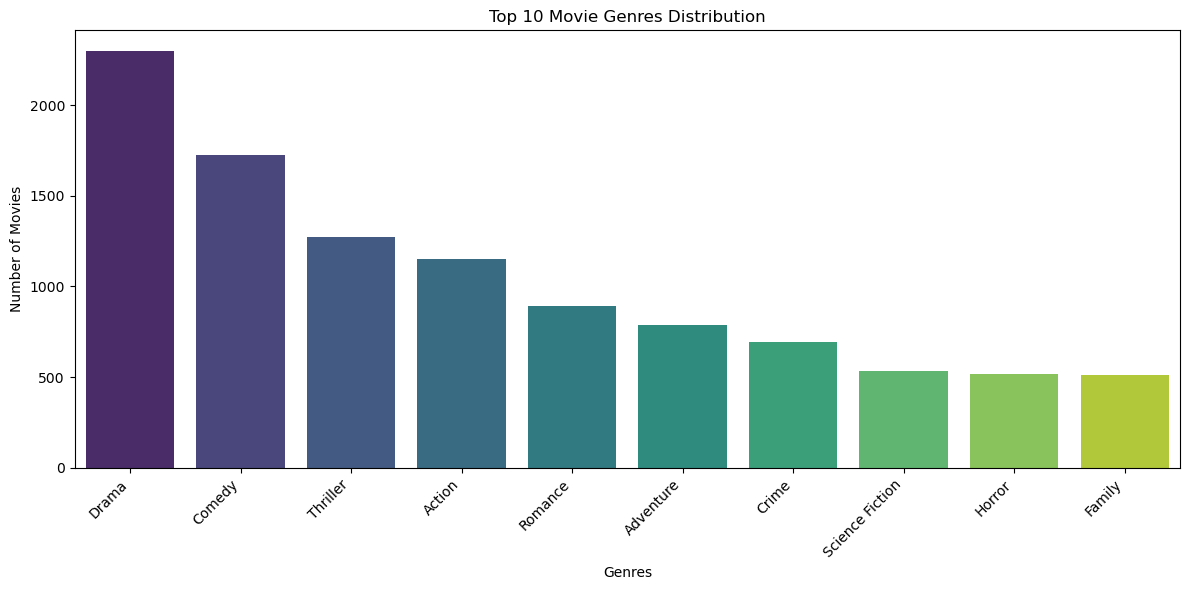

In [ ]:
df2['genres_list'] = df2['genres'].apply(lambda x: [i['name'] for i in json.loads(x)])
all_genres = [genre for sublist in df2['genres_list'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Movie Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insigth

1. **Genre Drama Mendominasi:** Genre drama memiliki jumlah film yang jauh lebih banyak dibandingkan genre lainnya, dengan lebih dari 2250 film. Ini menunjukkan popularitas atau produksi yang tinggi untuk film bergenre drama.

2. **Comedy dan Thriller Menyusul:** Setelah drama, genre komedi dan thriller menempati posisi berikutnya dengan jumlah film yang signifikan, masing-masing di atas 1700 dan 1250 film.

3. **Penurunan Jumlah Film:** Terlihat tren penurunan jumlah film secara bertahap dari genre drama hingga family. Hal ini mengindikasikan bahwa genre-genre di urutan atas lebih banyak diproduksi atau tersedia dibandingkan dengan genre-genre di urutan bawah.

4. **Perbedaan Signifikan:** Perbedaan jumlah film antara beberapa genre cukup besar. Contohnya, selisih antara drama dan komedi lebih dari 500 film, sementara selisih antara horror dan family relatif kecil.

5. **Genre dengan Jumlah Sedikit:** Genre seperti science fiction, horror, dan family memiliki jumlah film yang relatif lebih sedikit dibandingkan genre-genre populer seperti drama, komedi, dan thriller.




#### Visualisasi distribusi bahasa menggunakan diagram batang

Langkah:
- Hitung frekuensi bahasa asli film dan dapatkan 10 teratas
- Memvisualisasikan distribusi bahasa menggunakan diagram batang


C:\Users\adijo\AppData\Local\Temp\ipykernel_21864\1192091969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='plasma')


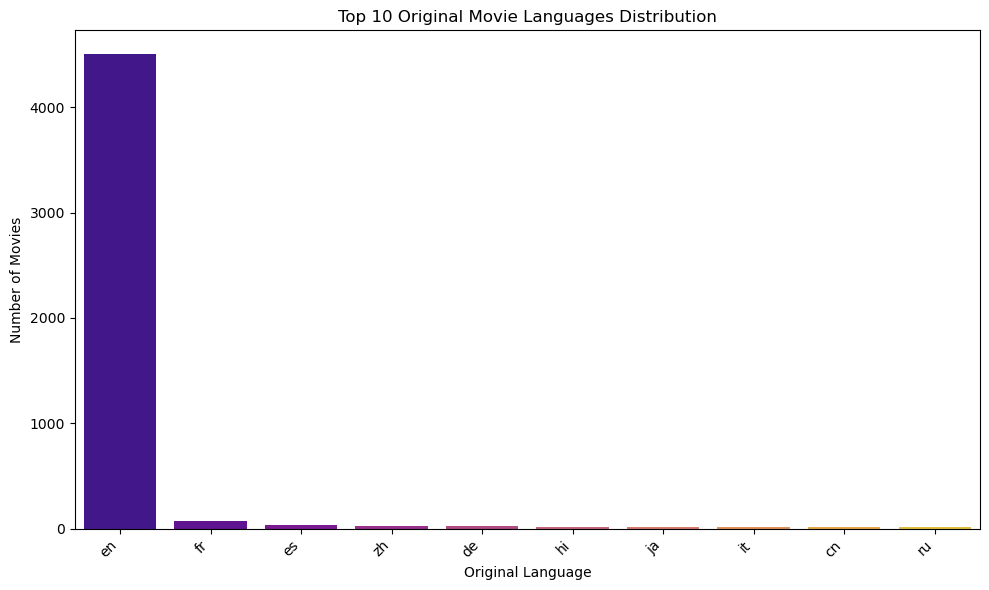

In [ ]:
language_counts = df2['original_language'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='plasma')
plt.title('Top 10 Original Movie Languages Distribution')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Insigth

1. **Bahasa Inggris Dominan**
   Bahasa Inggris ("en") sangat mendominasi dengan lebih dari 4.500 film, jauh di atas bahasa lain.

2. **Bahasa Lain Tertinggal Jauh**
   Bahasa seperti Prancis, Spanyol, Mandarin, Hindi, dan lainnya masing-masing hanya menyumbang sebagian kecil (kurang dari 150 film).

3. **Distribusi Tidak Merata**
   Industri film global sangat terpusat pada produksi berbahasa Inggris.

4. **Peluang untuk Bahasa Lokal**
   Kehadiran bahasa Asia seperti Hindi, Mandarin, dan Korea menunjukkan potensi pertumbuhan jika didukung distribusi yang baik.


#### Visualisasi distribusi status rilis film menggunakan bar chart

Langkah:
- Hitung jumlah setiap status
- Visualisasi distribusi status rilis film menggunakan bar chart


C:\Users\adijo\AppData\Local\Temp\ipykernel_21864\1730280149.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


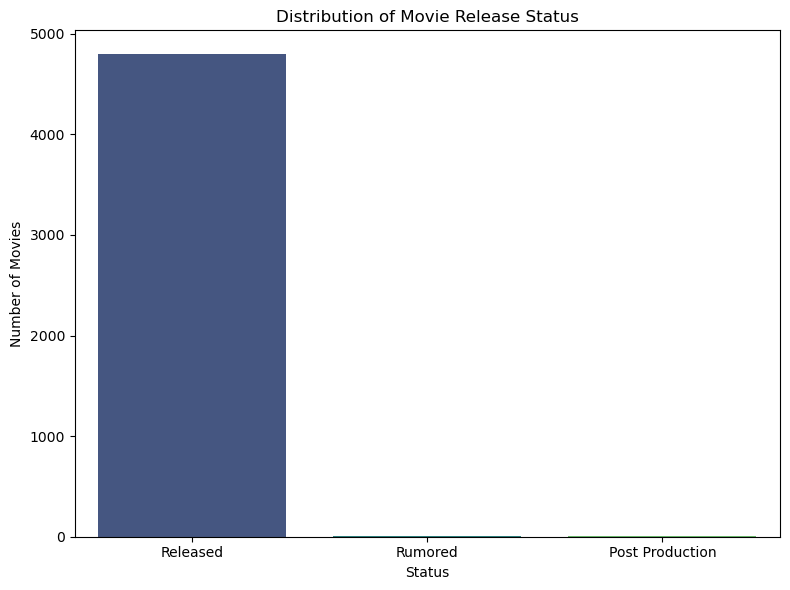

In [ ]:
status_counts = df2['status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribution of Movie Release Status')
plt.xlabel('Status')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Insigth
Berikut insight ringkas dari grafik distribusi status rilis film:

1. **Mayoritas Film Sudah Dirilis**
   Sebagian besar film (hampir 5.000) berstatus "Released".

2. **Jumlah Film yang Belum Dirilis Sangat Sedikit**
   Film dengan status "Rumored" dan "Post Production" jumlahnya sangat kecil dibandingkan yang sudah dirilis.

3. **Fokus Data pada Film yang Telah Tayang**
   Dataset ini sangat terpusat pada film yang telah dirilis, sehingga cocok untuk analisis performa atau tren film yang sudah tersedia di pasar.


#### Visualisasi distribusi tahun rilis film

Langkah:
- Mengubah kolom 'release_date' menjadi tipe datetime
- Mengekstrak tahun dari tanggal rilis
- Menghitung jumlah film per tahun
- Visualisasi distribusi tahun rilis menggunakan histogram
- Menampilkan statistik deskriptif untuk tahun rilis


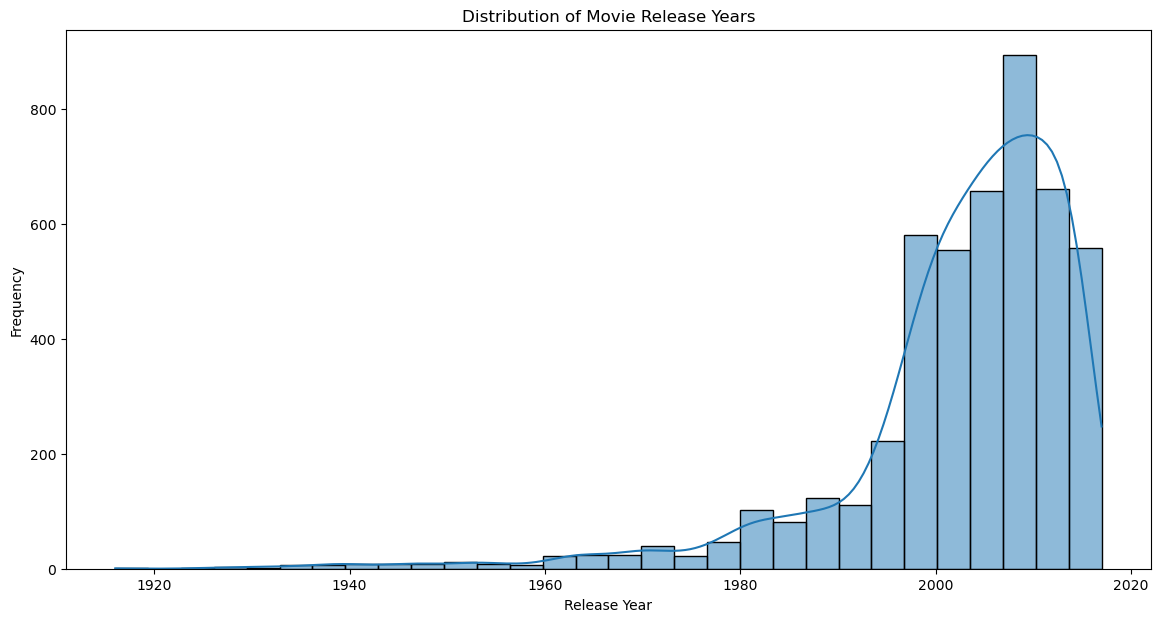


Statistik Deskriptif untuk Tahun Rilis:
count    4802.000000
mean     2002.468763
std        12.414354
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64


In [ ]:
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')

df2['release_year'] = df2['release_date'].dt.year

release_year_counts = df2['release_year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
sns.histplot(df2['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

print("\nStatistik Deskriptif untuk Tahun Rilis:")
print(df2['release_year'].describe())


#### Insight

Berikut insight ringkas dari grafik dan statistik distribusi tahun rilis film:

1. **Mayoritas Film Dirilis Setelah Tahun 2000**
   Dengan nilai median tahun rilis adalah **2005**, serta 75% film dirilis setelah **1999**, terlihat bahwa mayoritas film dalam dataset merupakan produksi **modern**.

2. **Peningkatan Produksi Sejak 1970-an**
   Terjadi lonjakan produksi film sejak era 1970-an, yang terus meningkat hingga mencapai puncaknya pada **2005–2015**.

3. **Dominasi Film Era 2000-an**
   Nilai **rata-rata (mean)** tahun rilis adalah **2002**, yang menunjukkan dominasi film dari dua dekade terakhir dalam dataset ini.

4. **Distribusi Kurang Merata Sebelum 1980**
   Nilai **minimum** adalah tahun **1916**, namun hanya sebagian kecil film yang dirilis sebelum **1980**, mencerminkan perkembangan industri film yang masih terbatas pada periode tersebut.

5. **Penurunan Setelah Tahun 2015**
   Penurunan tajam pada jumlah film rilis setelah **2015** dapat disebabkan oleh keterbatasan data terbaru atau gangguan industri seperti pandemi.



#### Visualisasi Popularitas 10 Film Teratas

Langkah:
- Urutkan DataFrame berdasarkan kolom 'popularity' secara menurun dan ambil 10 baris teratas
- Visualisasi Popularitas 10 Film Teratas


C:\Users\adijo\AppData\Local\Temp\ipykernel_21864\1707329557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='popularity', data=top_popular_movies, palette='viridis')


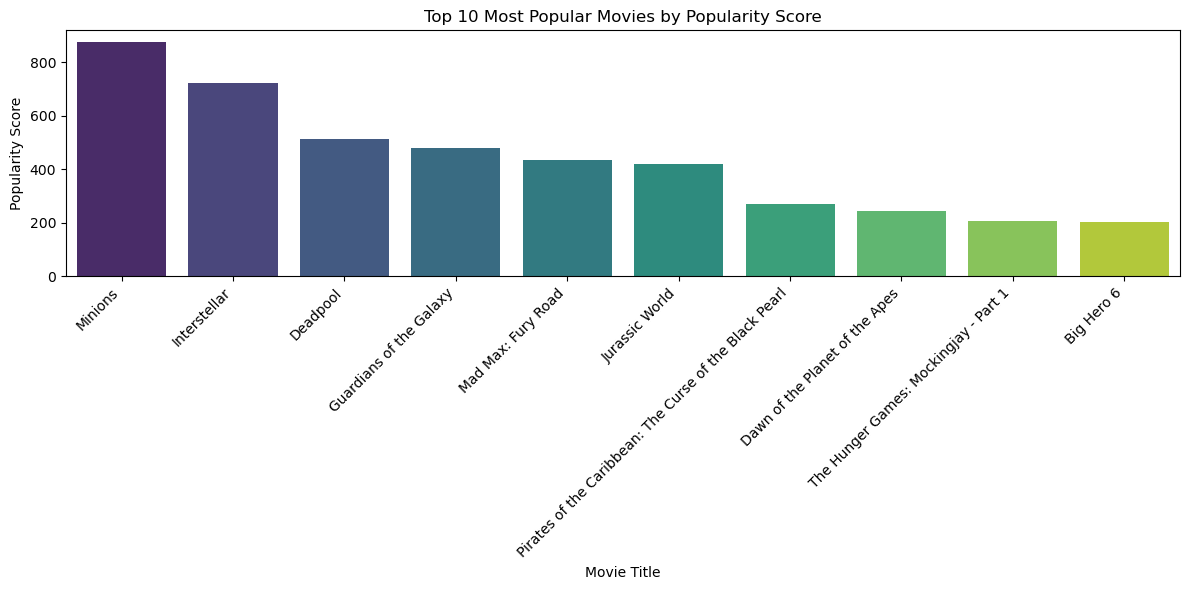

In [ ]:
top_popular_movies = df2.sort_values(by='popularity', ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='popularity', data=top_popular_movies, palette='viridis')
plt.title('Top 10 Most Popular Movies by Popularity Score')
plt.xlabel('Movie Title')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Insight

1. **Minions Merajai Popularitas**
   Film *Minions* menempati posisi teratas dengan skor popularitas tertinggi, melampaui film-film lain secara signifikan.

2. **Dominasi Film Blockbuster**
   Film-film populer seperti *Interstellar*, *Deadpool*, *Guardians of the Galaxy*, dan *Jurassic World* termasuk dalam daftar, menunjukkan bahwa **film dengan skala produksi besar dan cakupan global cenderung memiliki skor popularitas tinggi**.

3. **Franchise dan Film Aksi/Fantasi Mendominasi**
   Sebagian besar film dalam daftar ini merupakan bagian dari franchise besar atau bergenre aksi/sci-fi/fantasi, yang biasanya memiliki basis penggemar luas dan dukungan promosi besar-besaran.

4. **Distribusi Popularitas Turun Signifikan**
   Setelah posisi ke-2, skor popularitas mengalami penurunan bertahap namun signifikan, dengan perbedaan hampir 700 poin antara film pertama (*Minions*) dan ke-10 (*Big Hero 6*), menunjukkan **skala kesenjangan popularitas yang besar di antara film-film top**.



#### Visualisasi Popularitas 10 Film Terendah

Langkah:
- Urutkan DataFrame berdasarkan kolom 'popularity' secara menaik dan ambil 10 baris teratas
- Visualisasi Popularitas 10 Film Terendah


C:\Users\adijo\AppData\Local\Temp\ipykernel_21864\3363478589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='popularity', data=bottom_popular_movies, palette='viridis')


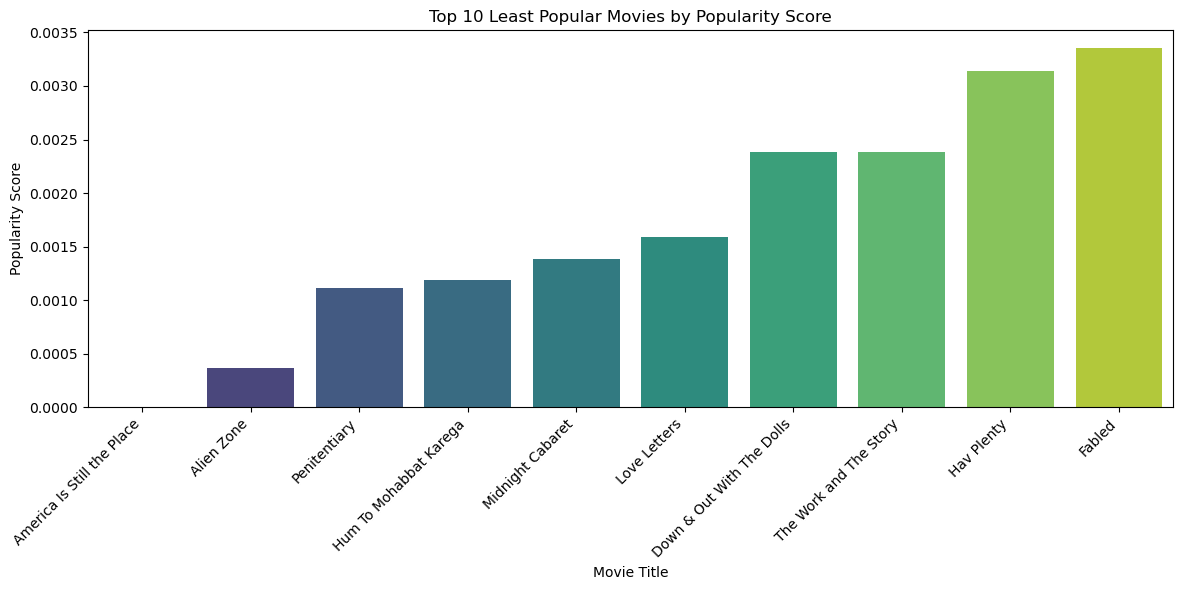

In [ ]:
bottom_popular_movies = df2.sort_values(by='popularity', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='popularity', data=bottom_popular_movies, palette='viridis')
plt.title('Top 10 Least Popular Movies by Popularity Score')
plt.xlabel('Movie Title')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insight

1. **Film Kurang Dikenal Mendominasi Daftar**
   Judul-judul seperti *America Is Still the Place*, *Alien Zone*, dan *Penitentiary* kemungkinan besar kurang dikenal atau memiliki distribusi terbatas, yang berkontribusi pada skor popularitas yang sangat rendah.

2. **Skor Popularitas Sangat Rendah dan Merata**
   Nilai popularitas pada daftar ini sangat kecil, dengan kisaran di bawah 0.0035. Ini menandakan **minimnya eksposur publik terhadap film-film ini**, baik dari sisi penayangan, promosi, maupun pencarian daring.

3. **Potensi Film Independen atau Niche**
   Judul-judul ini berpotensi merupakan film indie, dokumenter lokal, atau rilisan terbatas yang tidak menyasar pasar massal, sehingga secara alami memperoleh skor popularitas yang lebih rendah.

4. **Perbedaan Jarak Sangat Tajam dengan Film Paling Populer**
   Dibandingkan dengan film terpopuler seperti *Minions* (dengan skor >800), **film-film ini memiliki skor yang nyaris mendekati nol**, menunjukkan **kontras ekstrem dalam jangkauan audiens dan penerimaan publik**.

## **Data Preprocessing**

### Menggabungkan dataset

Menggabungkan `df1` dan `df2` menggunakan fungsi `pd.merge()` berdasarkan kolom `movie_id` di `df1` dan `id` di `df2`.


In [ ]:
df = pd.merge(df1, df2, left_on='movie_id', right_on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_id              4803 non-null   int64         
 1   title_x               4803 non-null   object        
 2   cast                  4803 non-null   object        
 3   crew                  4803 non-null   object        
 4   budget                4803 non-null   int64         
 5   genres                4803 non-null   object        
 6   homepage              1712 non-null   object        
 7   id                    4803 non-null   int64         
 8   keywords              4803 non-null   object        
 9   original_language     4803 non-null   object        
 10  original_title        4803 non-null   object        
 11  overview              4800 non-null   object        
 12  popularity            4803 non-null   float64       
 13  production_compani

In [ ]:
df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,genres_list,release_year
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]",2009.0
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]",2007.0
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]",2015.0
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]",2012.0
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",2012.0


## **Data Preparation**

### **Data Cleaning**

Pada tahap ini, dilakukan pembersihan dan penyesuaian data agar dataset siap digunakan untuk analisis dan pemodelan. Berikut penjelasan detail setiap langkahnya:

**Langkah-langkah Data Cleaning**

1. **Menghapus Kolom Duplikat dan Tidak Relevan**
   - Setelah penggabungan dua dataset utama, kolom `id` dihapus karena sudah ada kolom `movie_id` yang nilainya sama. Ini mencegah duplikasi informasi dan menjaga konsistensi data.
   - Kolom `title_y` dihapus karena merupakan hasil penggabungan dari dua dataset dan nilainya identik dengan `title_x`. Dengan demikian, hanya satu kolom judul yang digunakan untuk menghindari kebingungan.

2. **Mengubah Nama Kolom agar Konsisten**
   - Kolom hasil penggabungan yang bernama `title_x` diubah namanya menjadi `title`. Tujuannya agar penamaan kolom lebih ringkas, konsisten, dan mudah digunakan pada proses selanjutnya.

3. **Membuat Salinan DataFrame**
   - DataFrame hasil pembersihan disalin ke variabel baru (`df_pre`). Salinan ini dibuat agar data asli tetap aman, sehingga jika terjadi kesalahan pada proses berikutnya, data awal tidak akan rusak dan bisa digunakan kembali.

4. **Menangani Nilai Kosong pada Fitur Teks**
   - Nilai kosong (NaN) pada kolom `tagline` dan `overview` diisi dengan string kosong. Langkah ini penting agar proses pemrosesan teks (seperti TF-IDF) tidak mengalami error akibat adanya nilai kosong.


**Hasil Akhir**

Setelah proses data cleaning:
- Dataset gabungan sudah tidak memiliki kolom duplikat atau tidak relevan.
- Semua nilai pada kolom teks utama (`tagline` dan `overview`) sudah terisi, sehingga tidak ada nilai kosong.
- Data sudah siap untuk proses ekstraksi fitur dan analisis lebih lanjut.
---

Menghapus kolom `id` pada dataset hasil penggabungan, karena sudah ada `movie_id` dengan nilai yang sama.

In [ ]:
del df['id']

Menghapus kolom `title_y` karena kolom ini sudah ada `title_x` dengan nilai yang identik.

In [ ]:
del df['title_y']

Merubah nama kolom 'title_x' menjadi 'title'

In [ ]:
df.rename(columns={'title_x': 'title'}, inplace=True)

Membuat salinan DataFrame `df` ke variabel baru `df_pre`

In [ ]:
df_pre = df.copy()

Mengisi nilai kosong (missing value/NaN) pada kolom `tagline` dan   `overview` dengan string kosong (`''`)

In [ ]:
df_pre['tagline'] = df_pre['tagline'].fillna('')
df_pre['overview'] = df_pre['overview'].fillna('')

### Ekstraksi

> Pada tahap ini dilakukan proses persiapan data agar fitur-fitur yang digunakan sudah dalam format yang sesuai untuk analisis lebih lanjut.

* **Ekstraksi Kata Kunci (Keywords)**: Kolom `keywords`, yang awalnya berupa string JSON, diubah menjadi list nama-nama kata kunci menggunakan `json.loads` dan list comprehension. Ini memudahkan proses ekstraksi fitur berbasis teks.

* **Ekstraksi Pemeran (Cast)**: Kolom `cast`, juga berupa string JSON, diubah menjadi list nama-nama pemeran untuk setiap film dengan cara serupa.

* **Seleksi Kolom**: Hanya kolom-kolom yang relevan untuk analisis lanjutan yang disimpan, yaitu `title`, `genres_list`, `keywords_list`, `overview`, `tagline`, `cast_list`, dan `popularity`.

Tujuan

* Mengubah struktur data menjadi lebih mudah diproses oleh model machine learning.
* Menyederhanakan data agar fokus pada informasi penting terkait konten dan metadata film.
* Mengurangi bias dan meningkatkan akurasi model.

In [ ]:
df_pre['keywords_list'] = df_pre['keywords'].apply(json.loads).apply(lambda x: [d['name'] for d in x])
df_pre['cast_list'] = df_pre['cast'].apply(json.loads).apply(lambda x: [d['name'] for d in x])

df_pre = df_pre[['title','genres_list','keywords_list','overview','tagline','cast_list','popularity']]
df_pre.head()

,title,genres_list,keywords_list,overview,tagline,cast_list,popularity
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",150.437577
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",139.082615
2,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",107.376788
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Legend Ends,"[Christian Bale, Michael Caine, Gary Oldman, A...",112.312950
4,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","Lost in our world, found in another.","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",43.926995


### Normalisasi Data Popularity
Karena popularity memiliki nilai numerik yang besar, maka dilakukan normalisasi agar fitur ini tidak mendominasi perhitungan jarak atau kemiripan dibanding fitur lain seperti genre, keyword, dan lainnya yang telah dinormalisasi dalam bentuk vektor (seperti TF-IDF atau one-hot encoding).

Langkah-langkah normalisasi:
- Mengambil data kolom `popularity` dari DataFrame.
- Inisialisasi objek `MinMaxScaler` dari scikit-learn.
- Melakukan fit dan transformasi data popularity agar berada pada rentang 0 hingga 1.

In [ ]:

popularity_data = df_pre[['popularity']].values

scaler = MinMaxScaler()

popularity_scaled = scaler.fit_transform(popularity_data)

### Transformasi Fitur Teks dan Numerik

> Pada tahap ini, dilakukan ekstraksi dan transformasi beberapa fitur penting dari dataset film untuk membentuk representasi numerik yang bisa digunakan dalam pemodelan machine learning. Fitur-fitur yang digunakan mencakup genre, ringkasan film (*overview*), kata kunci (*keywords*), pemeran (*cast*), tagline, dan tingkat popularitas.

* **Genre**: Kolom `genres_list`, yang berisi daftar genre untuk setiap film, dikonversi menjadi format biner. Setiap genre direpresentasikan sebagai kolom, dan setiap film diberi tanda 1 jika memiliki genre tersebut, atau 0 jika tidak.

* **Overview**: Kolom `overview`, yang berisi ringkasan film dalam bentuk teks, diubah menjadi vektor menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency). Hanya 5000 kata yang paling informatif yang dipilih untuk mewakili isi dari kolom ini.

* **Keywords**: Kata kunci dari setiap film digabungkan menjadi satu string per baris, kemudian diproses menggunakan TF-IDF dengan batas maksimum 3000 fitur. Tujuannya adalah untuk menangkap konteks atau topik unik dari setiap film.

* **Cast**: Nama-nama pemeran utama dalam `cast_list` digabung menjadi string dan diubah menjadi representasi TF-IDF dengan 2000 fitur teratas. Ini membantu mengidentifikasi aktor-aktor yang sering muncul atau berpengaruh dalam film.

* **Tagline**: Kalimat singkat promosi film (tagline) juga ditransformasikan menjadi vektor TF-IDF, dibatasi hingga 2000 fitur terpenting.

* **Popularitas**: Menggunakan nilai Popularitas yang sudah di normalisasikan, agar fitur ini tidak mendominasi perhitungan jarak atau kemiripan dibanding fitur lain seperti genre, keyword, dan lainnya yang telah dinormalisasi dalam bentuk vektor (seperti TF-IDF atau one-hot encoding).

**Proses:**

1. **Ekstraksi Genre (One-hot Encoding):**

   * Menggunakan `MultiLabelBinarizer()` untuk mengubah daftar genre (`genres_list`) menjadi matriks biner.
   * Setiap kolom merepresentasikan satu genre; setiap baris menunjukkan apakah film tersebut memiliki genre tersebut atau tidak.

2. **Ekstraksi Fitur dari Overview (Deskripsi Film):**

   * Menggunakan `TfidfVectorizer` dengan `stop_words='english'` dan batas maksimum 5000 fitur.
   * Tujuannya adalah merepresentasikan ringkasan (`overview`) dalam bentuk vektor numerik berdasarkan frekuensi kemunculan kata penting.

3. **Ekstraksi Fitur dari Keywords (Kata Kunci):**

   * Sama seperti overview, tapi diterapkan pada `keywords_list` yang digabungkan menjadi satu string per film.
   * Jumlah fitur maksimum dibatasi hingga 3000.

4. **Ekstraksi Fitur dari Cast (Pemeran):**

   * Mengubah daftar aktor utama (`cast_list`) menjadi teks gabungan, lalu diekstraksi menggunakan TF-IDF.
   * Fitur ini membatasi hingga 2000 kata unik paling informatif.

5. **Ekstraksi Fitur dari Tagline:**

   * Sama seperti overview dan keywords, tapi diterapkan pada `tagline` (slogan film).
   * Jumlah fitur juga dibatasi hingga 2000.

> Setelah semua fitur diekstraksi dan ditransformasi, seluruh vektor tersebut digabungkan secara horizontal untuk membentuk satu matriks fitur utama. Matriks inilah yang nantinya akan digunakan dalam proses pelatihan model atau analisis clustering.

Tujuan

* Mengubah data teks menjadi representasi numerik yang bisa diproses oleh algoritma machine learning.
* Menggabungkan berbagai sumber informasi (konten film, metadata, hingga statistik popularitas) untuk membentuk fitur yang lebih kaya dan informatif.



In [ ]:
mlb = MultiLabelBinarizer()
genre_mat = mlb.fit_transform(df_pre['genres_list'])

tfidf_over = TfidfVectorizer(stop_words='english', max_features=5000)
over_mat = tfidf_over.fit_transform(df_pre['overview'])

tfidf_key = TfidfVectorizer(stop_words='english', max_features=3000)
key_mat = tfidf_key.fit_transform(df_pre['keywords_list'].apply(lambda x: ' '.join(x)))

tfidf_cast = TfidfVectorizer(stop_words='english', max_features=2000)
cast_mat = tfidf_cast.fit_transform(df_pre['cast_list'].apply(lambda x: ' '.join(x)))

tfidf_tagline = TfidfVectorizer(stop_words='english', max_features=2000)
tagline_mat = tfidf_tagline.fit_transform(df_pre['tagline'])


Menggabungkan semua matriks fitur secara horizontal (genre, overview, keywords, tagline, cast) dan menambahkan kolom 'popularity' sebagai fitur numerik

In [ ]:
feature_mat = hstack([genre_mat, over_mat, key_mat, tagline_mat, cast_mat,  popularity_scaled])

## **Modeling and Results**

### **Content‑based Filtering**

Pada tahap ini, kita akan membangun sistem rekomendasi berbasis konten menggunakan pendekatan berikut:

#### **Langkah-langkah Implementasi**

##### **1. Menentukan Nama Film Referensi (Input)**  

- **Penjelasan**: Variabel `nama_film` menyimpan judul film yang akan digunakan sebagai acuan untuk rekomendasi, dalam hal ini adalah "Superman". Nama ini akan digunakan untuk mencari film serupa berdasarkan fitur tertentu (misalnya, genre atau fitur lain yang sudah diolah sebelumnya dalam `feature_mat`).


##### **2. Membuat Mapping dari Judul Film ke Indeks**  

- **Penjelasan**:
  - Kode ini membuat **pemetaan** (mapping) antara judul film (kolom `'title'` dalam DataFrame `df_pre`) dengan indeks barisnya di DataFrame.
  - `pd.Series` digunakan untuk membuat Series dengan indeks berupa judul film dan nilai berupa indeks baris dari DataFrame `df_pre`.
  - `drop_duplicates()` memastikan tidak ada duplikasi judul film dalam mapping, sehingga setiap judul film memiliki indeks unik.
  - **Tujuan**: Memudahkan pencarian indeks film berdasarkan judulnya untuk proses rekomendasi.


##### **3. Menghitung Cosine Similarity Antar Film**  

- **Penjelasan**:
  - Fungsi `cosine_similarity` dari library seperti `scikit-learn` digunakan untuk menghitung **kemiripan kosinus** (cosine similarity) antara semua pasangan film dalam matriks fitur `feature_mat`.
  - `feature_mat` diasumsikan sebagai matriks yang berisi representasi numerik dari fitur film (misalnya, vektor genre, deskripsi, atau fitur lain yang sudah diproses sebelumnya).
  - Hasilnya adalah matriks `cos_sim` berukuran NxN (dengan N adalah jumlah film), di mana setiap elemen `(i, j)` menunjukkan skor kemiripan antara film ke-i dan film ke-j.
  - Skor kemiripan berkisar antara 0 (tidak mirip) hingga 1 (sangat mirip).


##### **4. Fungsi get_recommendations**  

- **Penjelasan**:
  - **Fungsi**: Fungsi ini menghasilkan rekomendasi film berdasarkan judul film yang diberikan (`title`) dan jumlah rekomendasi yang diinginkan (`top_n`, default 10).
  - **Langkah-langkah**:
    1. **Cek keberadaan film**: Memeriksa apakah judul film ada dalam `indices`. Jika tidak, mengembalikan pesan bahwa film tidak ditemukan.
    2. **Ambil indeks film**: Menggunakan `indices[title]` untuk mendapatkan indeks film dari judul yang diberikan.
    3. **Ambil skor kemiripan**: Mengambil semua skor kemiripan dari film input (`cos_sim[idx]`) dan menggabungkannya dengan indeks film menggunakan `enumerate` untuk melacak film mana yang memiliki skor tersebut.
    4. **Urutkan berdasarkan kemiripan**: Mengurutkan daftar skor kemiripan dari tertinggi ke terendah (`reverse=True`) dan mengambil `top_n` film teratas (mengabaikan film itu sendiri dengan `[1:top_n+1]`).
    5. **Ekstrak indeks dan skor**: Memisahkan indeks film yang direkomendasikan (`rec_idx`) dan skor kemiripannya (`similarity_scores`).
    6. **Buat DataFrame rekomendasi**: Mengambil judul dan genre dari DataFrame `df_pre` untuk indeks yang direkomendasikan, menambahkan kolom `similarity_score`, dan membulatkannya ke 3 desimal.
  - **Output**: Mengembalikan DataFrame berisi judul film, genre, dan skor kemiripan untuk film yang direkomendasikan.

##### **5. Mendapatkan rekomendasi dengan similarity score**  

- **Penjelasan**:
  - Memanggil fungsi `get_recommendations` dengan input `nama_film` ("Superman") dan `top_n=10` untuk mendapatkan 10 film yang paling mirip dengan "Superman".
  - Hasilnya disimpan dalam variabel `recommendations` sebagai DataFrame yang berisi judul, genre, dan skor kemiripan.


##### **6. Menampilkan hasil dengan format yang lebih rapi**  

- **Penjelasan**:
  - **Cek keberadaan film**: Memeriksa apakah `nama_film` ada dalam `indices`. Jika tidak, menampilkan pesan bahwa film tidak ditemukan.
  - **Tampilkan genre film input**: Mengambil genre film input dari `df_pre['genres_list']` menggunakan indeks film dan menampilkannya.
  - **Format tabel rekomendasi**:
    1. Membuat salinan DataFrame `recommendations` untuk ditampilkan.
    2. Mengubah kolom `genres_list` (yang mungkin berupa list) menjadi string dengan genre dipisahkan koma menggunakan `', '.join(x)`.
    3. Mencetak header tabel dengan lebar kolom yang sudah ditentukan (No.id, Judul Film, Genre, Similarity Score).
    4. Mengiterasi setiap baris di `recommendations_table` untuk menampilkan nomor urut, judul film (maksimal 47 karakter), genre (maksimal 42 karakter), dan skor kemiripan dengan format yang rapi.
    5. Menggunakan formatting string (`:<`) untuk menjaga penyelarasan teks ke kiri dan memastikan tabel terlihat rapi dengan panjang kolom tetap.
  - **Output**: Menampilkan tabel rekomendasi dengan format yang mudah dibaca, menunjukkan 10 film yang mirip dengan "Superman" beserta genre dan skor kemiripannya.

---
> Hasil dari tahap ini adalah daftar rekomendasi film yang relevan berdasarkan konten film yang dipilih.

In [ ]:
nama_film = 'Superman'

indices = pd.Series(df_pre.index, index=df_pre['title']).drop_duplicates()

cos_sim = cosine_similarity(feature_mat, feature_mat)

def get_recommendations(title, top_n=10):
    if title not in indices:
        return f"Film '{title}' tidak ditemukan dalam dataset."

    idx = indices[title]
    sims = list(enumerate(cos_sim[idx]))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)[1:top_n+1]
    rec_idx = [i for i, _ in sims]
    similarity_scores = [score for _, score in sims]

    recommendations = df_pre[['title', 'genres_list', 'keywords_list', 'overview', 'tagline', 'cast_list', 'popularity']].iloc[rec_idx].copy()
    recommendations['similarity_score'] = similarity_scores
    recommendations['similarity_score'] = recommendations['similarity_score'].round(3)

    return recommendations

recommendations = get_recommendations(nama_film, 10)

if nama_film in indices:
    title_idx = indices[nama_film]
    film_info = df_pre.loc[title_idx]

    print(f"\nInformasi Film '{nama_film}':")
    print("="*100)
    print(f"Genre: {', '.join(film_info['genres_list'])}")
    print(f"Keywords: {', '.join(film_info['keywords_list'])}")
    print(f"Overview: {film_info['overview']}")
    print(f"Tagline: {film_info['tagline']}")
    print(f"Cast: {', '.join(film_info['cast_list'][:5])}...") # Show first 5 cast members
    print(f"Popularity: {film_info['popularity']:.2f}")

    print("\nRekomendasi Film:")
    print("="*100)

    for idx, row in recommendations.iterrows():
        print(f"\n{idx+1}. {row['title']}")
        print(f"   Similarity Score: {row['similarity_score']:.3f}")
        print(f"   Genre: {', '.join(row['genres_list'])}")
        print(f"   Keywords: {', '.join(row['keywords_list'])}")
        print(f"   Overview: {row['overview'][:200]}...")  # Truncate long overviews
        print(f"   Tagline: {row['tagline']}")
        print(f"   Cast: {', '.join(row['cast_list'][:5])}...")  # Show first 5 cast members
        print(f"   Popularity: {row['popularity']:.2f}")
        print("-"*100)
else:
    print(f"Film '{nama_film}' tidak ditemukan dalam dataset.")


Informasi Film 'Superman':
Genre: Action, Adventure, Fantasy, Science Fiction
Keywords: saving the world, journalist, dc comics, crime fighter, nuclear missile, galaxy, superhero, based on comic book, criminal, sabotage, north pole, midwest, kryptonite, super powers, superhuman strength, aftercreditsstinger, save the day
Overview: Mild-mannered Clark Kent works as a reporter at the Daily Planet alongside his crush, Lois Lane − who's in love with Superman. Clark must summon his superhero alter ego when the nefarious Lex Luthor launches a plan to take over the world.
Tagline: You'll Believe a Man Can Fly!
Cast: Christopher Reeve, Marlon Brando, Margot Kidder, Gene Hackman, Ned Beatty...
Popularity: 48.51

Rekomendasi Film:

14. Man of Steel
   Similarity Score: 0.688
   Genre: Action, Adventure, Fantasy, Science Fiction
   Keywords: saving the world, dc comics, superhero, based on comic book, superhuman, alien invasion, reboot, super powers, dc extended universe
   Overview: A young boy

#### **Insight**

**Input Film:** *Superman (1978)*

**Genre:** Action, Adventure, Fantasy, Science Fiction

**Tema utama:** Pahlawan super, menyelamatkan dunia, cinta segitiga (Clark, Lois, Superman), dan konflik dengan Lex Luthor.

#####  **Karakteristik Film ‘Superman’**

* **Topik utama:** Pahlawan super dari DC Comics yang harus menyelamatkan dunia dari penjahat.
* **Elemen cerita:** Identitas ganda (Clark/Superman), hubungan asmara, ancaman global, kekuatan super, moralitas.
* **Nuansa:** Inspiratif, penuh aksi, dan penuh harapan (seperti ditunjukkan dari tagline: *"You'll Believe a Man Can Fly!"*).

---

#####  **Rekomendasi Film Berdasarkan Similarity**

Dari daftar rekomendasi berdasarkan *similarity score*, kita bisa menyimpulkan:

 1. **Film dengan Kemiripan Tinggi (Score > 0.6)**

    * **Man of Steel (0.688)**: Reboot modern Superman, dengan konflik identitas yang serupa, tema penyelamatan dunia, dan asal-usul Krypton.
    * **Superman II (0.636)**: Sekuel langsung dari film utama, masih mengangkat tokoh dan konflik serupa.
    * **Superman III (0.563)**: Masih berhubungan, tapi mulai memasukkan unsur komedi dan krisis identitas.

    >   Film yang paling mirip secara struktural, karakter, dan narasi berasal dari waralaba yang sama (*Superman franchise*).

 2. **Film dari DC Comics Lain**

    * **Suicide Squad (0.510):** Masih dalam dunia DC, tetapi pendekatan dari sisi anti-hero dan tim penjahat.

 3. **Film dari Marvel / Genre Serupa**

    * **The Wolverine (0.540)** dan **X-Men: Days of Future Past (0.537)**: Meski bukan DC, namun memiliki tema superhero, kekuatan super, dan dilema moral.

> Meski beda semesta (Marvel vs DC), genre dan tema serupa masih membuat film-film ini dianggap relevan sebagai rekomendasi.

 4. **Film Sci-Fi Fantasi Umum**

    * **Avatar (0.514)** dan **Jupiter Ascending (0.508)**: Lebih banyak mengandung elemen fiksi ilmiah dan petualangan luar angkasa, tetapi mempertahankan nuansa epik dan visual kuat.

 5. **Superhero Unik atau Parodi**

    * **Mystery Men (0.500)** dan **The Shadow (0.503)**: Lebih ke arah parodi atau superhero klasik, nilai similarity lebih ke struktur cerita dan tema superhero.



### **Visualisasi Distribusi Skor Similarity**

Pada bagian ini, akan memvisualisasikan distribusi skor kesamaan antara film yang dipilih dengan 10 film yang direkomendasikan. Langkah-langkah yang dilakukan meliputi:

1. **Membuat DataFrame untuk Visualisasi**
   - Membuat DataFrame baru dengan kolom Title dan Similarity Score dari hasil rekomendasi.

2. **Menghitung Rata-rata Similarity**
   - Menghitung rata-rata skor kemiripan dari semua film yang direkomendasikan.

3. **Membuat Plot Batang**
   - Menggunakan seaborn barplot untuk memvisualisasikan skor kemiripan.
   - Menambahkan garis rata-rata dengan warna merah dan gaya garis putus-putus.

4. **Menyesuaikan Tampilan Plot**
   - Menambahkan judul yang mencantumkan nama film referensi.
   - Memberikan label sumbu X dan Y yang informatif.
   - Memutar label sumbu X 45° agar mudah dibaca.
   - Menambahkan nilai skor di atas setiap batang.

5. **Menambahkan Legenda**
   - Menampilkan legenda untuk menunjukkan garis rata-rata.

6. **Finalisasi Tampilan**
   - Menyesuaikan tata letak dengan tight_layout().
   - Menampilkan plot final.

> Hasil dari tahap ini adalah visualisasi diagram batang yang memberikan wawasan tentang tingkat kesamaan antara film yang dipilih dengan film-film yang direkomendasikan dan rata-rata similarity score.

C:\Users\adijo\AppData\Local\Temp\ipykernel_21864\2931162209.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Similarity Score', data=similarity_df, palette='viridis')


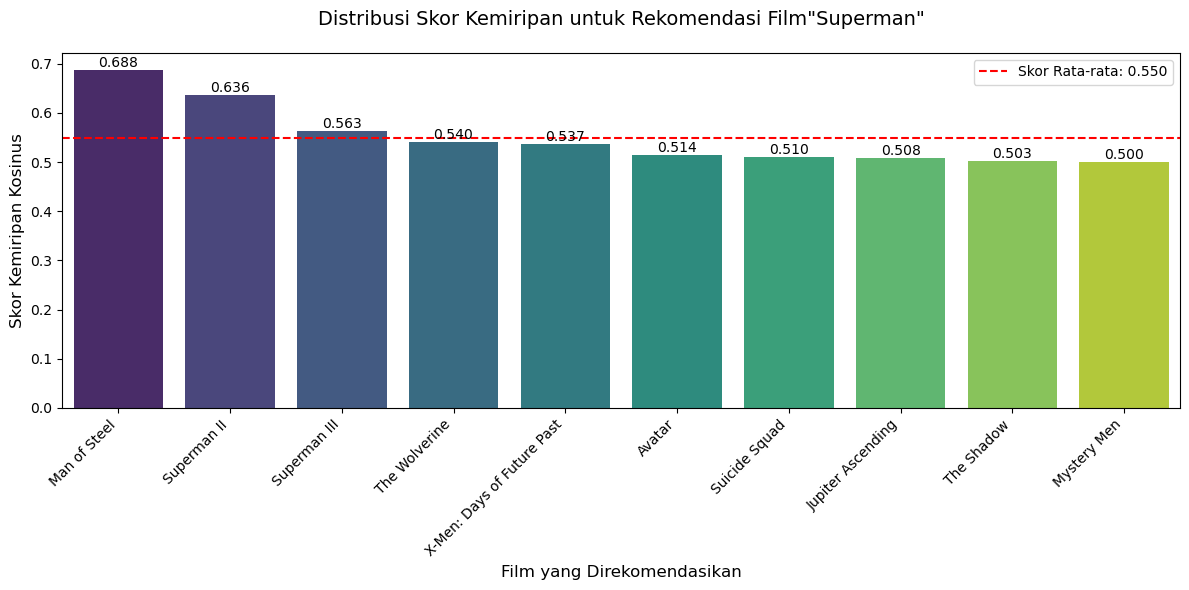

In [ ]:
similarity_df = pd.DataFrame({
    'Title': recommendations['title'],
    'Similarity Score': recommendations['similarity_score']
})

mean_similarity = similarity_df['Similarity Score'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Similarity Score', data=similarity_df, palette='viridis')

plt.axhline(y=mean_similarity, color='r', linestyle='--', label=f'Skor Rata-rata: {mean_similarity:.3f}')

plt.title(f'Distribusi Skor Kemiripan untuk Rekomendasi Film"{nama_film}"', fontsize=14, pad=20)
plt.xlabel('Film yang Direkomendasikan', fontsize=12)
plt.ylabel('Skor Kemiripan Kosinus', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for i, score in enumerate(similarity_df['Similarity Score']):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

#### **Insight**

Berikut adalah poin-poin utama dari visualisasi distribusi skor kemiripan untuk rekomendasi film mirip "Superman":

* **Skor Kemiripan Tertinggi:**

  * *Man of Steel* — **0.688**
  * *Superman II* — **0.636**
  * *Superman III* — **0.563**

* **Skor Rata-rata Kemiripan:**

  * Ditandai dengan garis merah putus-putus di grafik
  * Nilainya adalah **0.550**

* **Kesimpulan:**

  * Sebagian besar film memiliki skor kemiripan yang cukup dekat dengan nilai rata-rata.
  * Rekomendasi teratas sangat relevan karena berasal dari seri film *Superman* sendiri.
  * Film lain yang direkomendasikan juga memiliki kemiripan tematik atau genre dengan *Superman*, meskipun skornya sedikit di bawah rata-rata.


## **Evaluation - Content Based Filtering**

Berikut adalah rumus untuk menghitung Precision@k, Recall@k, dan F1-Score@k berdasarkan perbandingan genre antara film input dan film-film rekomendasi.

---

### Rumus Precision@k
$$\text{Precision@k} = \frac{1}{k} \sum_{i=1}^{k} \frac{|G_{\text{input}} \cap G_i|}{|G_i|}$$

- **Penjelasan**:  
  Precision@k menghitung rata-rata proporsi genre dalam setiap film rekomendasi yang juga terdapat pada genre film input.

  - $G_{\text{input}}$: Himpunan genre film input.  
  - $G_i$: Himpunan genre film rekomendasi ke-i.  
  - $|G_{\text{input}} \cap G_i|$: Jumlah genre yang sama antara film input dan film rekomendasi ke-i.  
  - $|G_i|$: Jumlah total genre dalam film rekomendasi ke-i.  
Rata-rata dihitung dari $k$ film rekomendasi.

---

### Rumus Recall@k
$$\text{Recall@k} = \frac{1}{k} \sum_{i=1}^{k} \frac{|G_{\text{input}} \cap G_i|}{|G_{\text{input}}|}$$

- **Penjelasan**:  
  Recall@k menghitung rata-rata proporsi genre film input yang ditemukan dalam genre setiap film rekomendasi.  

  - $|G_{\text{input}}|$: Jumlah total genre dalam film input.  
  - Rata-rata dihitung dari $k$ film rekomendasi.

---

### Rumus F1-Score@k
$$\text{F1-Score@k} = 2 \times \frac{\text{Precision@k} \times \text{Recall@k}}{\text{Precision@k} + \text{Recall@k}}$$

- **Penjelasan**:  
  F1-Score@k adalah rata-rata harmonik dari Precision@k dan Recall@k, memberikan ukuran keseimbangan antara keduanya.  
  - **Catatan**: Jika $\text{Precision@k} + \text{Recall@k} = 0$, maka $\text{F1-Score@k} = 0$ untuk menghindari pembagian dengan nol.

---

### Ringkasan
- **Precision@k**: Mengukur ketepatan genre rekomendasi dibandingkan genre yang direkomendasikan.  
- **Recall@k**: Mengukur kelengkapan genre input yang tercakup dalam rekomendasi.  
- **F1-Score@k**: Menggabungkan Precision@k dan Recall@k untuk evaluasi yang seimbang.  


In [ ]:
def compute_metrics_at_k(G_input, recommended_genres_list):
    """
    Menghitung Precision@k, Recall@k, dan F1-Score@k berdasarkan perbandingan genre
    antara film input dan film-film rekomendasi.

    Parameters:
    G_input (list): Daftar genre dari film input.
    recommended_genres_list (list of lists): Daftar yang berisi genre dari setiap film rekomendasi.

    Returns:
    tuple: (precision_at_k, recall_at_k, f1_score_at_k)
    """
    k = len(recommended_genres_list)
    if k == 0:
        return 0, 0, 0

    G_input_set = set(G_input)
    precision_sum = 0
    recall_sum = 0

    for G_i in recommended_genres_list:
        G_i_set = set(G_i)
        intersection = G_input_set.intersection(G_i_set)

        if len(G_i_set) > 0:
            precision_i = len(intersection) / len(G_i_set)
        else:
            precision_i = 0

        if len(G_input_set) > 0:
            recall_i = len(intersection) / len(G_input_set)
        else:
            recall_i = 0

        precision_sum += precision_i
        recall_sum += recall_i

    precision_at_k = precision_sum / k
    recall_at_k = recall_sum / k

    if precision_at_k + recall_at_k > 0:
        f1_score_at_k = 2 * (precision_at_k * recall_at_k) / (precision_at_k + recall_at_k)
    else:
        f1_score_at_k = 0

    return precision_at_k, recall_at_k, f1_score_at_k

recommended_genres_list = recommendations['genres_list'].tolist()

input_film_index = indices[nama_film]
G_input = df_pre.loc[input_film_index, 'genres_list']

precision, recall, f1 = compute_metrics_at_k(G_input, recommended_genres_list)

print(f"Precision@k: {precision}")
print(f"Recall@k: {recall}")
print(f"F1-Score@k: {f1}")

Precision@k: 0.9200000000000002
Recall@k: 1.0
F1-Score@k: 0.9583333333333334



####  **Insight:**


* **Precision\@k = 0.92**
  Menunjukkan bahwa 92% dari item yang direkomendasikan adalah benar-benar relevan bagi pengguna. Artinya, sistem memiliki tingkat ketepatan yang tinggi dalam memilih konten yang sesuai minat atau kebutuhan pengguna.

* **Recall\@k = 1.0**
  Menunjukkan bahwa semua item relevan yang seharusnya direkomendasikan telah berhasil dimasukkan ke dalam daftar. Tidak ada item penting yang terlewat, menandakan cakupan sistem sangat optimal.

* **F1-Score\@k = 0.958**
  Merupakan rata-rata harmonis dari precision dan recall. Nilai ini menunjukkan bahwa sistem memiliki keseimbangan yang sangat baik antara akurasi dan kelengkapan dalam memberikan rekomendasi.






## **Kesimpulan**
Sistem rekomendasi berbasis konten ini telah menunjukkan hasil yang memuaskan dalam memberikan rekomendasi film yang relevan. Dengan pengembangan lebih lanjut, sistem ini dapat menjadi alat yang lebih efektif untuk membantu pengguna menemukan film yang sesuai dengan preferensi mereka dan memiliki potensi untuk meningkatkan *engagement* pada platform streaming.

####  **Exploratory Data Analysis (EDA)**

Analisis data eksploratif memberikan pemahaman mendalam terhadap karakteristik film dalam dataset:

* **Genre Drama Paling Populer**, disusul oleh **Comedy** dan **Thriller**, menandakan ketertarikan publik dan tingginya produksi terhadap genre-genre ini.
* **Bahasa Inggris Mendominasi**, dengan distribusi bahasa lain sangat rendah, menunjukkan dominasi industri film Hollywood secara global.
* **Mayoritas Film Sudah Dirilis**, artinya data sangat fokus pada film yang tersedia untuk analisis performa dan rekomendasi.
* **Puncak Produksi Film Terjadi antara 2005–2015**, dengan tren meningkat sejak 1970-an, lalu menurun setelah 2015 (kemungkinan karena pandemi atau keterbatasan data terbaru).
* **Popularitas Tertinggi Dimiliki Film Blockbuster seperti *Minions***, sementara film dengan popularitas sangat rendah didominasi oleh film indie, niche, atau distribusi terbatas — mencerminkan kesenjangan jangkauan audiens yang besar.

####  **Modeling & Hasil Rekomendasi**

* Sistem berhasil merekomendasikan film-film yang **relevan secara tematik dan genrenya** terhadap film acuan, yaitu *Superman (1978)*.
* **Man of Steel**, *Superman II*, hingga film Marvel seperti *X-Men* dan *The Wolverine* muncul sebagai hasil karena kemiripan naratif dan karakteristik superhero.
* Ini menunjukkan bahwa model mampu **menangkap hubungan semantik dan struktural** antarfilm, tidak hanya berdasarkan nama atau studio saja.

####  **Evaluasi Sistem (Content-Based Filtering)**

* **Precision\@k = 0.92**, **Recall\@k = 1.0**, dan **F1-Score\@k = 0.958** membuktikan bahwa sistem memiliki **kinerja luar biasa** dalam memberikan rekomendasi yang akurat dan lengkap.
* Artinya, hampir semua film yang direkomendasikan **tepat sasaran**, dan **tidak ada film penting yang terlewatkan**.


#### **Kesimpulan Sistem Rekomendasi Berbasis Konten**

Sistem rekomendasi film berbasis konten ini menunjukkan hasil yang **kuat dan dapat diandalkan**. Dengan pemahaman yang baik terhadap fitur-fitur film (genre, bahasa, popularitas, dll), sistem mampu:

* Memberikan **rekomendasi yang relevan dan presisi tinggi**
* Menangkap **kesamaan tematik maupun naratif** antarfilm
* Memenuhi ekspektasi evaluasi melalui metrik performa yang sangat tinggi
* Sebagian besar film memiliki skor kemiripan yang cukup dekat dengan nilai rata-rata.
* Rekomendasi teratas sangat relevan karena berasal dari seri film *Superman* sendiri.
* Film lain yang direkomendasikan juga memiliki kemiripan tematik atau genre dengan *Superman*, meskipun skornya sedikit di bawah rata-rata.



